# Duffing oscillator demo

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from __future__ import division
%matplotlib notebook

In [3]:
# function to help plot 2D solutions of continuous Dynamical Systems

def MultiPhasePlot(F,IC,dt=0.001,t_max=50,quiver=True,xlim=[-2,2],ylim=[-2,2],dquiver=0.1):
    """
    Returns the numerically integrated (euler method) solutions of 2D dX/dt = F(X) for all initial conditions in list IC.
    F must be a R^2-->R^2 vector field of the form dx,dy = F(x,y).
    """
    num_steps = int(t_max/dt)
    Traj = []
    for ic in IC:
        traj = np.ndarray([num_steps,2],dtype=float) #container for solution
        traj[0,0], traj[0,1] = ic[0], ic[1]
        for t in range(1,num_steps): #euler integration
            traj[t,:] = traj[t-1,:]+dt*np.array(F(traj[t-1,0],traj[t-1,1]))
        Traj.append(traj)
    
    # plot
    plt.figure()
    for traj in Traj:
        plt.plot(traj[:,0],traj[:,1])
        plt.plot(traj[0,0],traj[0,1],'k.')
    if quiver:
        X, Y = np.meshgrid(np.arange(xlim[0],xlim[1],dquiver), np.arange(ylim[0],ylim[1],dquiver))
        dX, dY = F(X,Y)
        plt.quiver(X, Y, dX, dY, units='width')
    plt.xlim(xlim)
    plt.ylim(ylim)



<IPython.core.display.Javascript object>


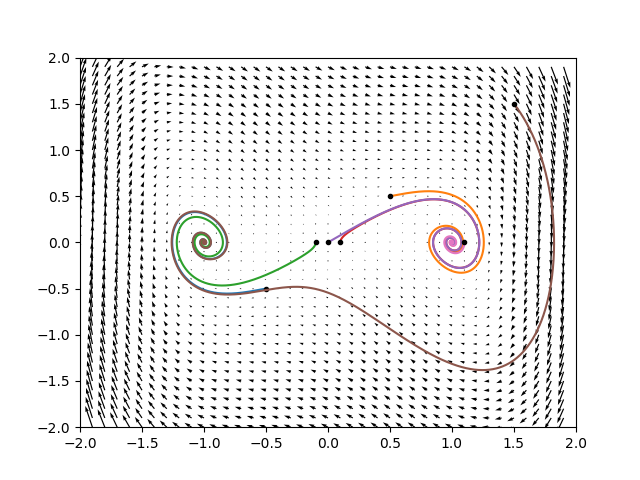

In [4]:
# Duffing Oscillator
def Duff(x,y,delta):
    dx = y
    dy = x-np.power(x,3)-delta*y 
    return dx,dy

# plot
delta = 0.5
IC = [[-.5,-.5],[.5,.5],[-.1,0.],[.1,0],[0.001,0],[1.5,1.5],[1.1,0]]
F = lambda x,y: Duff(x,y,delta)
MultiPhasePlot(F,IC,quiver=True)


<IPython.core.display.Javascript object>


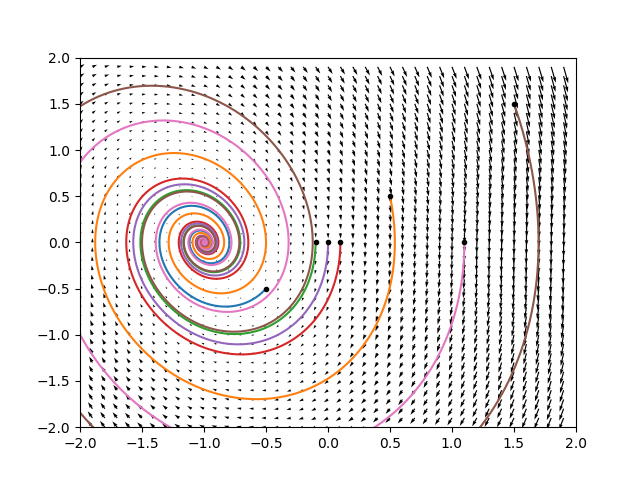

In [5]:
# linearized Duffin
def LDuff(x,y,x0,y0,delta):
    dx = (y-y0)
    dy = (1-3*np.power(x0,2))*(x-x0)-delta*(y-y0)
    return dx,dy

# plot
delta = .5
x0,y0 = -1.,0.
IC = [[-.5,-.5],[.5,.5],[-.1,0.],[.1,0],[0.001,0],[1.5,1.5],[1.1,0]]#[[-.5,-.5],[.5,.5]] #,[0.001,0],[1.5,1.5],[1.1,0]]
F = lambda x,y: LDuff(x,y,x0,y0,delta)
MultiPhasePlot(F,IC,quiver=True)


<IPython.core.display.Javascript object>


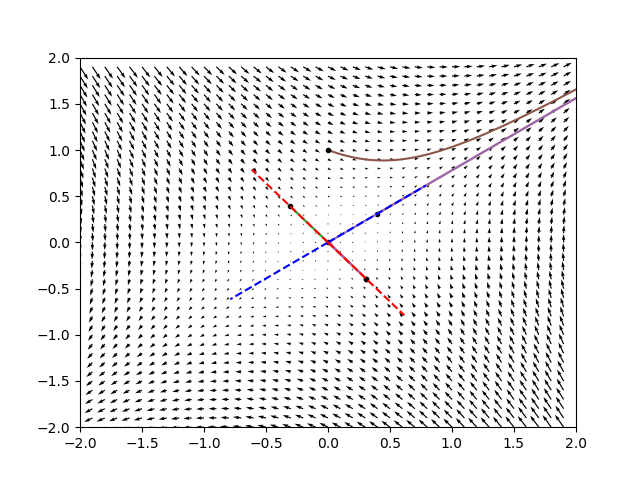

In [6]:
# invariant subspaces of linearized Duffin
def LDuff(x,y,x0,y0,delta):
    dx = (y-y0)
    dy = (1-3*np.power(x0,2))*(x-x0)-delta*(y-y0)
    return dx,dy

# params
delta = .5
x0,y0 = 0.,0.
F = lambda x,y: LDuff(x,y,x0,y0,delta)
A = np.array([F(1,0),F(0,1)])
lambdas,V = np.linalg.eig(A)

# plot trajectories
IC = [[0.,0.],0.5*V[:,0],0.5*V[:,1],-0.5*V[:,1],-0.5*V[:,1]+[0.001],[0,1]]
MultiPhasePlot(F,IC,quiver=True,t_max=10)

# plotting eigvectors
plt.plot([0,V[0,0]],[0,V[1,0]],'b--')
plt.plot([0,-V[0,0]],[0,-V[1,0]],'b--')
plt.plot([0,V[0,1]],[0,V[1,1]],'r--')
plt.plot([0,-V[0,1]],[0,-V[1,1]],'r--')

In [7]:
lambdas

array([ 0.78077641, -1.28077641])

<IPython.core.display.Javascript object>


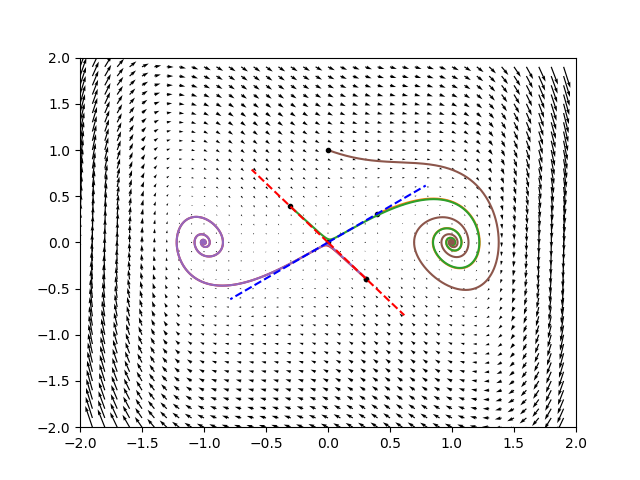

In [8]:
# Duffing Oscillator
def Duff(x,y,delta):
    dx = y
    dy = x-np.power(x,3)-delta*y 
    return dx,dy

# plot
delta = 0.5
IC = [[0.,0.],0.5*V[:,0],0.5*V[:,1],-0.5*V[:,1],-0.5*V[:,1]+[0.001],[0,1]]
F = lambda x,y: Duff(x,y,delta)
MultiPhasePlot(F,IC,quiver=True)

# plotting eigvectors
plt.plot([0,V[0,0]],[0,V[1,0]],'b--')
plt.plot([0,-V[0,0]],[0,-V[1,0]],'b--')
plt.plot([0,V[0,1]],[0,V[1,1]],'r--')
plt.plot([0,-V[0,1]],[0,-V[1,1]],'r--')

## Basins of Attraction

<IPython.core.display.Javascript object>


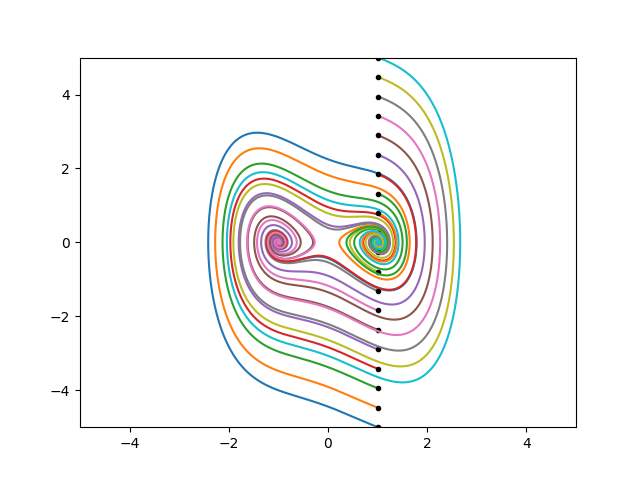

In [16]:
# Duffing Oscillator
def Duff(x,y,delta):
    dx = y
    dy = x-np.power(x,3)-delta*y 
    return dx,dy

# plot
delta = .5
IC = [[1.01,x] for x in np.linspace(-5,5,20)]
F = lambda x,y: Duff(x,y,delta)
MultiPhasePlot(F,IC,xlim=[-5,5],ylim=[-5,5],quiver=False)

